## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.083179 -0.590772  0.937081 -0.816907 -0.517349 -0.758209
1  0.852879  0.192401 -0.708522  1.563254 -0.680839  1.504991
2  0.068355  1.022328  1.449088  1.520096 -1.420058  1.861049
3 -0.504960  1.133245  0.160739 -1.504992  1.317542 -0.405656
4 -0.031200  0.890577 -0.715586  0.148672  1.475524  1.084656


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9509257	total: 57ms	remaining: 57s
1:	learn: 0.9399338	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9307677	total: 58ms	remaining: 19.3s
3:	learn: 0.9204628	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9124608	total: 59ms	remaining: 11.7s
5:	learn: 0.9039020	total: 59.5ms	remaining: 9.85s
6:	learn: 0.8939145	total: 59.9ms	remaining: 8.5s
7:	learn: 0.8845514	total: 60.3ms	remaining: 7.47s
8:	learn: 0.8768578	total: 60.8ms	remaining: 6.69s
9:	learn: 0.8685391	total: 61.2ms	remaining: 6.06s
10:	learn: 0.8595782	total: 61.7ms	remaining: 5.55s
11:	learn: 0.8499501	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8404924	total: 62.9ms	remaining: 4.78s
13:	learn: 0.8333263	total: 63.4ms	remaining: 4.46s
14:	learn: 0.8265823	total: 64ms	remaining: 4.2s
15:	learn: 0.8193560	total: 64.5ms	remaining: 3.97s
16:	learn: 0.8122088	total: 65ms	remaining: 3.76s
17:	learn: 0.8048232	total: 65.5ms	remaining: 3.58s
18:	learn: 0.7967334	total: 66.1ms	remaining: 3.41s
19:	le

109:	learn: 0.3821726	total: 108ms	remaining: 875ms
110:	learn: 0.3795443	total: 109ms	remaining: 871ms
111:	learn: 0.3768292	total: 109ms	remaining: 865ms
112:	learn: 0.3741903	total: 109ms	remaining: 859ms
113:	learn: 0.3716761	total: 110ms	remaining: 854ms
114:	learn: 0.3684338	total: 110ms	remaining: 848ms
115:	learn: 0.3659915	total: 111ms	remaining: 844ms
116:	learn: 0.3635170	total: 111ms	remaining: 838ms
117:	learn: 0.3610748	total: 112ms	remaining: 834ms
118:	learn: 0.3586625	total: 112ms	remaining: 832ms
119:	learn: 0.3563542	total: 113ms	remaining: 828ms
120:	learn: 0.3540984	total: 113ms	remaining: 823ms
121:	learn: 0.3518324	total: 114ms	remaining: 818ms
122:	learn: 0.3489710	total: 114ms	remaining: 813ms
123:	learn: 0.3466337	total: 114ms	remaining: 808ms
124:	learn: 0.3446648	total: 115ms	remaining: 804ms
125:	learn: 0.3423402	total: 115ms	remaining: 800ms
126:	learn: 0.3396510	total: 116ms	remaining: 795ms
127:	learn: 0.3372138	total: 116ms	remaining: 791ms
128:	learn: 

275:	learn: 0.1338412	total: 186ms	remaining: 489ms
276:	learn: 0.1331167	total: 187ms	remaining: 488ms
277:	learn: 0.1322759	total: 187ms	remaining: 487ms
278:	learn: 0.1318955	total: 188ms	remaining: 485ms
279:	learn: 0.1311070	total: 188ms	remaining: 484ms
280:	learn: 0.1307607	total: 188ms	remaining: 482ms
281:	learn: 0.1299574	total: 189ms	remaining: 481ms
282:	learn: 0.1289951	total: 189ms	remaining: 480ms
283:	learn: 0.1282841	total: 190ms	remaining: 478ms
284:	learn: 0.1274787	total: 190ms	remaining: 477ms
285:	learn: 0.1268142	total: 191ms	remaining: 476ms
286:	learn: 0.1260127	total: 191ms	remaining: 475ms
287:	learn: 0.1251248	total: 192ms	remaining: 474ms
288:	learn: 0.1244526	total: 193ms	remaining: 475ms
289:	learn: 0.1236246	total: 193ms	remaining: 474ms
290:	learn: 0.1228802	total: 194ms	remaining: 473ms
291:	learn: 0.1221235	total: 194ms	remaining: 471ms
292:	learn: 0.1213457	total: 195ms	remaining: 471ms
293:	learn: 0.1205844	total: 196ms	remaining: 470ms
294:	learn: 

458:	learn: 0.0527134	total: 275ms	remaining: 324ms
459:	learn: 0.0525267	total: 276ms	remaining: 324ms
460:	learn: 0.0523347	total: 276ms	remaining: 323ms
461:	learn: 0.0522571	total: 277ms	remaining: 322ms
462:	learn: 0.0521804	total: 277ms	remaining: 321ms
463:	learn: 0.0518784	total: 278ms	remaining: 321ms
464:	learn: 0.0518032	total: 278ms	remaining: 320ms
465:	learn: 0.0516244	total: 278ms	remaining: 319ms
466:	learn: 0.0515505	total: 279ms	remaining: 318ms
467:	learn: 0.0512574	total: 279ms	remaining: 318ms
468:	learn: 0.0511850	total: 280ms	remaining: 317ms
469:	learn: 0.0511135	total: 280ms	remaining: 316ms
470:	learn: 0.0508277	total: 281ms	remaining: 316ms
471:	learn: 0.0507576	total: 281ms	remaining: 315ms
472:	learn: 0.0505796	total: 282ms	remaining: 314ms
473:	learn: 0.0505108	total: 282ms	remaining: 313ms
474:	learn: 0.0503414	total: 283ms	remaining: 313ms
475:	learn: 0.0501012	total: 283ms	remaining: 312ms
476:	learn: 0.0500342	total: 284ms	remaining: 311ms
477:	learn: 

620:	learn: 0.0241816	total: 354ms	remaining: 216ms
621:	learn: 0.0240712	total: 354ms	remaining: 215ms
622:	learn: 0.0239461	total: 355ms	remaining: 215ms
623:	learn: 0.0238278	total: 355ms	remaining: 214ms
624:	learn: 0.0237541	total: 356ms	remaining: 213ms
625:	learn: 0.0236818	total: 356ms	remaining: 213ms
626:	learn: 0.0235657	total: 357ms	remaining: 212ms
627:	learn: 0.0234949	total: 357ms	remaining: 212ms
628:	learn: 0.0233756	total: 357ms	remaining: 211ms
629:	learn: 0.0233060	total: 358ms	remaining: 210ms
630:	learn: 0.0232020	total: 358ms	remaining: 210ms
631:	learn: 0.0231339	total: 359ms	remaining: 209ms
632:	learn: 0.0230671	total: 360ms	remaining: 208ms
633:	learn: 0.0230016	total: 360ms	remaining: 208ms
634:	learn: 0.0228763	total: 360ms	remaining: 207ms
635:	learn: 0.0227912	total: 361ms	remaining: 207ms
636:	learn: 0.0227275	total: 362ms	remaining: 206ms
637:	learn: 0.0226170	total: 362ms	remaining: 205ms
638:	learn: 0.0224952	total: 363ms	remaining: 205ms
639:	learn: 

800:	learn: 0.0123469	total: 445ms	remaining: 110ms
801:	learn: 0.0123164	total: 445ms	remaining: 110ms
802:	learn: 0.0122864	total: 446ms	remaining: 109ms
803:	learn: 0.0122575	total: 446ms	remaining: 109ms
804:	learn: 0.0122460	total: 447ms	remaining: 108ms
805:	learn: 0.0121964	total: 447ms	remaining: 108ms
806:	learn: 0.0121583	total: 447ms	remaining: 107ms
807:	learn: 0.0121296	total: 448ms	remaining: 106ms
808:	learn: 0.0120705	total: 448ms	remaining: 106ms
809:	learn: 0.0120127	total: 449ms	remaining: 105ms
810:	learn: 0.0120029	total: 449ms	remaining: 105ms
811:	learn: 0.0119919	total: 450ms	remaining: 104ms
812:	learn: 0.0119561	total: 450ms	remaining: 104ms
813:	learn: 0.0118870	total: 451ms	remaining: 103ms
814:	learn: 0.0118513	total: 451ms	remaining: 102ms
815:	learn: 0.0117789	total: 452ms	remaining: 102ms
816:	learn: 0.0117197	total: 453ms	remaining: 101ms
817:	learn: 0.0117104	total: 453ms	remaining: 101ms
818:	learn: 0.0116998	total: 453ms	remaining: 100ms
819:	learn: 

958:	learn: 0.0075699	total: 523ms	remaining: 22.4ms
959:	learn: 0.0075255	total: 524ms	remaining: 21.8ms
960:	learn: 0.0074844	total: 524ms	remaining: 21.3ms
961:	learn: 0.0074345	total: 525ms	remaining: 20.7ms
962:	learn: 0.0074207	total: 525ms	remaining: 20.2ms
963:	learn: 0.0074071	total: 525ms	remaining: 19.6ms
964:	learn: 0.0073647	total: 526ms	remaining: 19.1ms
965:	learn: 0.0073514	total: 526ms	remaining: 18.5ms
966:	learn: 0.0073365	total: 527ms	remaining: 18ms
967:	learn: 0.0073219	total: 527ms	remaining: 17.4ms
968:	learn: 0.0073108	total: 528ms	remaining: 16.9ms
969:	learn: 0.0072991	total: 529ms	remaining: 16.4ms
970:	learn: 0.0072860	total: 529ms	remaining: 15.8ms
971:	learn: 0.0072751	total: 530ms	remaining: 15.3ms
972:	learn: 0.0072610	total: 530ms	remaining: 14.7ms
973:	learn: 0.0072496	total: 531ms	remaining: 14.2ms
974:	learn: 0.0072356	total: 531ms	remaining: 13.6ms
975:	learn: 0.0072225	total: 532ms	remaining: 13.1ms
976:	learn: 0.0072113	total: 532ms	remaining: 12

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

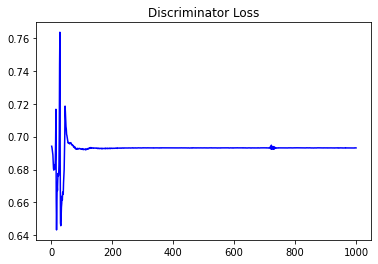

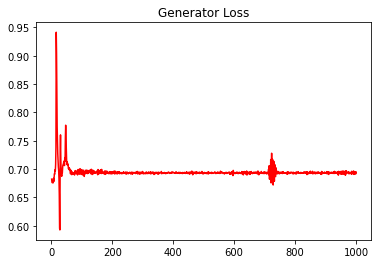

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.23876632969987413


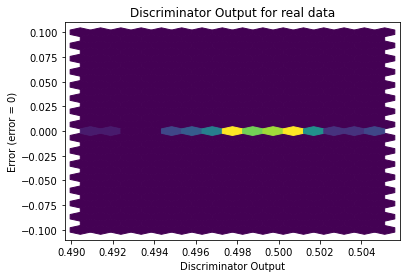

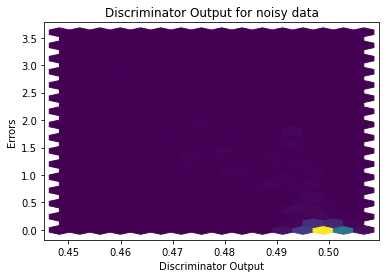

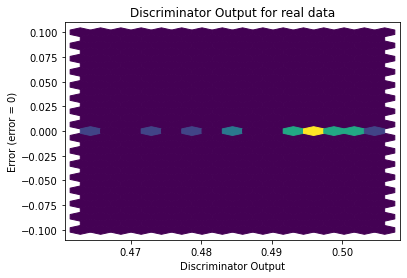

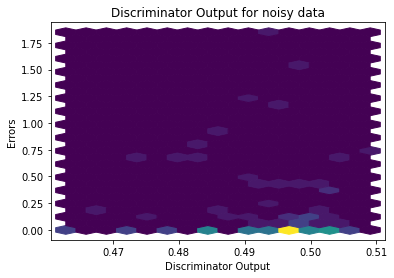

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


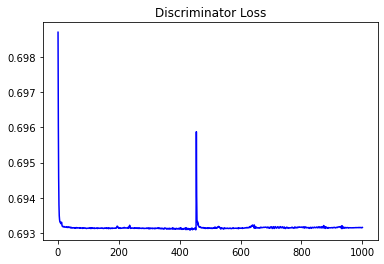

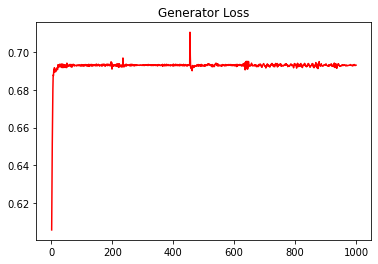

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.25036905670173126


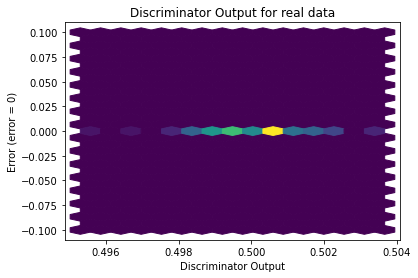

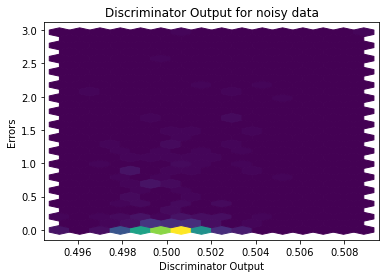

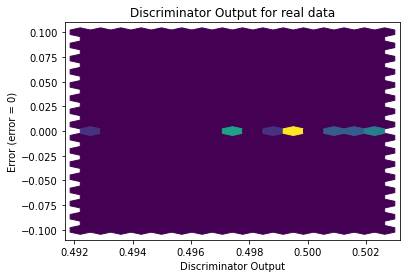

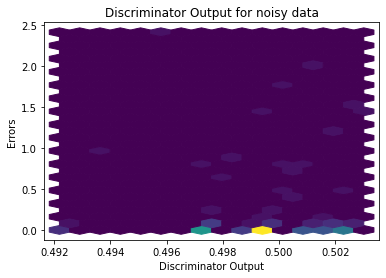

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0288]], requires_grad=True)
